In [122]:
import numpy as np
class HardSVM:
    def __init__(self,learning_rate=0.01,max_iter=1000):
        self.learning_rate=learning_rate
        self.max_iter=max_iter
        self.w=None
        self.b=None
    def loss(self,X,y):
        n_samples=len(X)
        loss=0
        for i in range(n_samples):
            if(y[i]*(np.dot(self.w,X[i])+self.b)<1):
                loss+=1-y[i]*(np.dot(self.w,X[i])+self.b)
                
        loss=loss+0.5*np.dot(self.w,self.w)
        return loss/n_samples
   
    
    def fit(self,X,y):
        self.w=np.zeros(X.shape[1])
        self.b=0
        n_samples,n_features=X.shape
        
        for i in range(self.max_iter):
            
            for j in range(n_samples):
                if(y[j]*(np.dot(self.w,X[j])+self.b)<1):
                    self.w=self.w-self.learning_rate*(-y[j]*X[j])
                    self.b=self.b-self.learning_rate*(-y[j])
                else:
                    self.w=self.w-self.learning_rate*self.w
                    
            
                    
                    
            
            
            
        
    def predict(self,X):
        return np.sign(np.dot(X,self.w)+self.b)
    
    
            
        
        
        
        
        
        
        
        
        


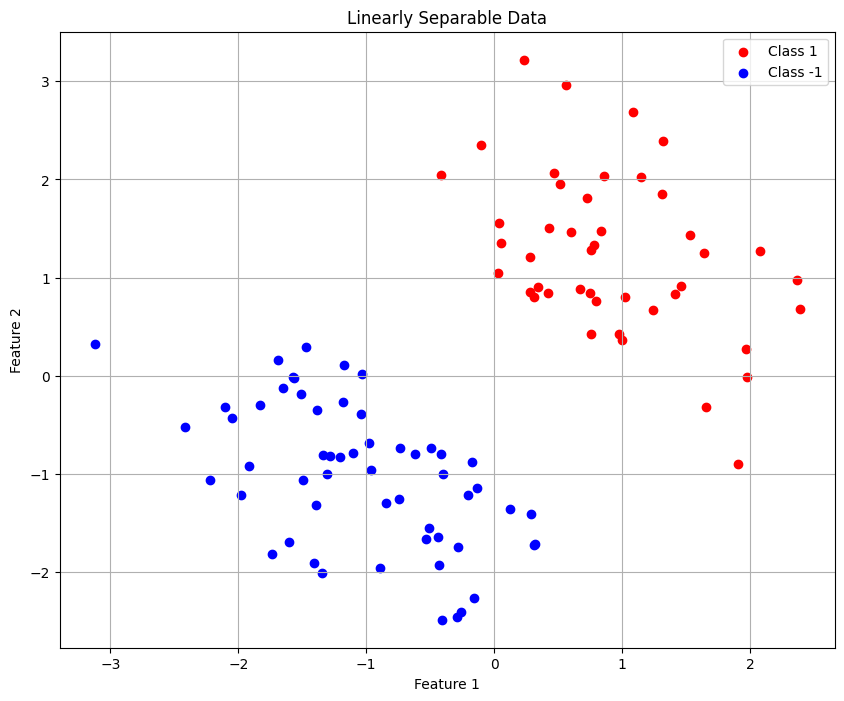

X shape: (100, 2)
y shape: (100,)


In [123]:
import matplotlib.pyplot as plt
# Generate linearly separable data
np.random.seed(42)  # For reproducibility

# Generate 100 samples with 2 features
n_samples = 100
X = np.random.randn(n_samples, 2)

# Create labels based on a linear decision boundary
# Using a simple line: x + y = 0 as the decision boundary
y = np.sign(X[:, 0] + X[:, 1])

# Add some margin to make the data more clearly separable
X = X + 0.5 * y.reshape(-1, 1)

# Visualize the data
plt.figure(figsize=(10, 8))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', label='Class -1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data')
plt.legend()
plt.grid(True)
plt.show()

# Print the shape of our data
print("X shape:", X.shape)
print("y shape:", y.shape)


0.9159030183638079
0.916694024916983
0.9174814170520654
0.9182652094435145
0.9190454167263082
0.9198220534958035
0.9106468285121828
0.9114618257809244
0.9122731115230766
0.9130807006707614
0.9138846081176046
0.9146848487185677
0.9154814372897836
0.9162743886083978
0.9170637174124132
0.9178494384005388
0.9186315662320436
0.9194101155266134
0.9201851008642136
0.9209565367849533
0.9117699953305234
0.9125798949899544
0.9133861034415506
0.9141886355674036
0.9149875062108451
0.9157827301762842
0.9165743222290509
0.917362297095242
0.9181466694615729
0.9189274539752327


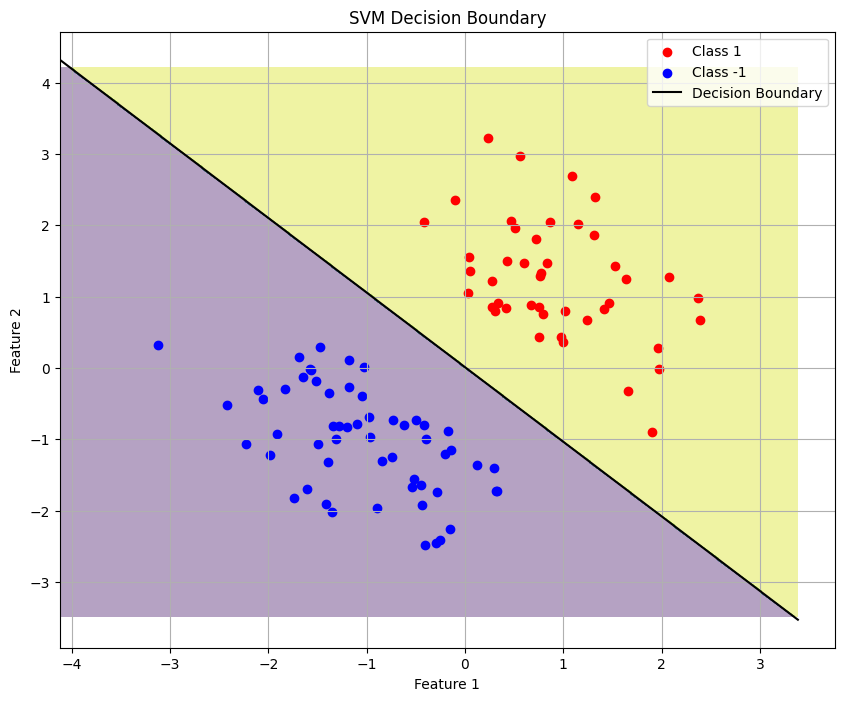

In [124]:
model=HardSVM(0.005,100)
model.fit(X,y)

y_pred=model.predict(X)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Calculate decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', label='Class -1')

# Plot the decision boundary line
w = model.w
b = model.b
x_line = np.array([x_min, x_max])
y_line = -(w[0] * x_line + b) / w[1]
plt.plot(x_line, y_line, 'k-', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()





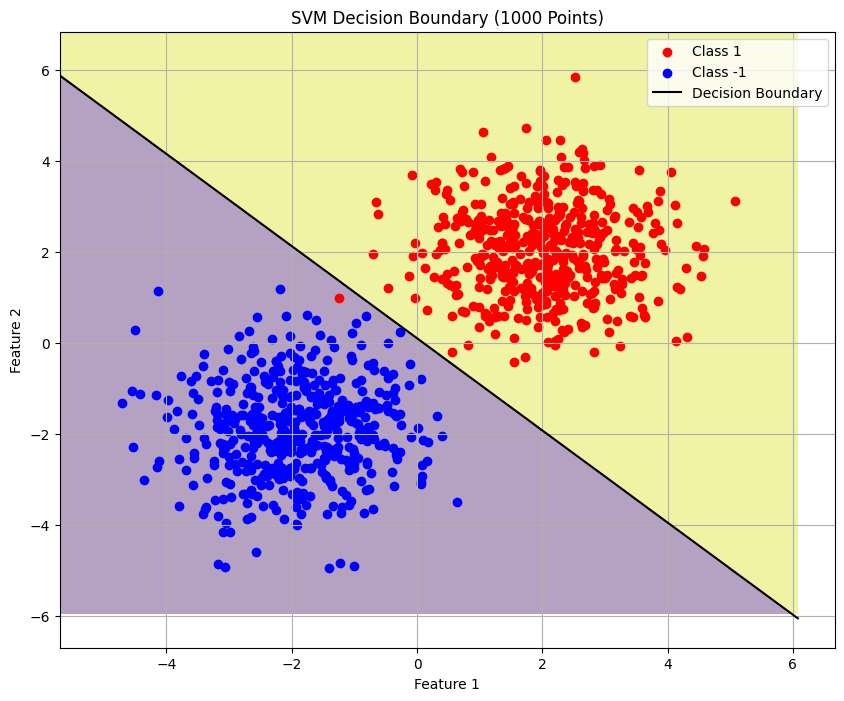

In [125]:
# Generate new linearly separable dataset
np.random.seed(42)
n_samples = 1000

# Generate two classes with clear separation
X1 = np.random.randn(n_samples//2, 2) + np.array([2, 2])
X2 = np.random.randn(n_samples//2, 2) + np.array([-2, -2])
X = np.vstack([X1, X2])
y = np.hstack([np.ones(n_samples//2), -np.ones(n_samples//2)])

# Create and train the model
model = HardSVM(0.0001, 1000)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Calculate decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', label='Class -1')

# Plot the decision boundary line
w = model.w
b = model.b
x_line = np.array([x_min, x_max])
y_line = -(w[0] * x_line + b) / w[1]
plt.plot(x_line, y_line, 'k-', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary (1000 Points)')
plt.legend()
plt.grid(True)
plt.show()
